<a href="https://colab.research.google.com/github/maushamkumar/PyTorch/blob/main/)3_PyTorch_computer_vision_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer vision

## 0. Computer vision libraries in PyTorch
* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
*`torchvision.models` - get pre-trained computer vision models that you can leverage for your own problem
`torchvision.transforms` - functions for manipulating your vision data (images) to be suit for use with an ML model.
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a python iterable over a dataset

In [1]:
# Import PyTorch
import torch
from torch import nn  # nn contains all of PyTorch's building blocks for neural networks

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


## Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.dataset

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True, # Do you want a training dataset?
    download=True, # Do you want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # How do we want to transform the data?
    target_transform=None # How do we want to transform the labels/targets?


)

100%|██████████| 26421880/26421880 [00:02<00:00, 11900548.77it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 203868.53it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3810613.70it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9279018.91it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform = ToTensor(),
    target_transform = None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
# Check the shape
train_data.data.shape, test_data.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [10]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [11]:
print(f"Image shape: {image.shape} -> [Color_channels, Height, widht]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [Color_channels, Height, widht]
Image label: Ankle boot


### 1.2 Visualize our data

Image shape: torch.Size([1, 28, 28])


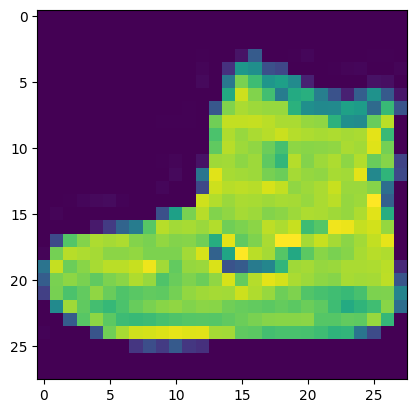

In [12]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

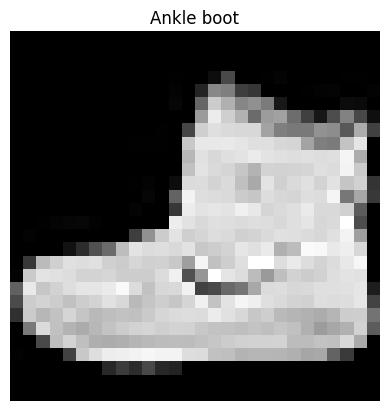

In [13]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

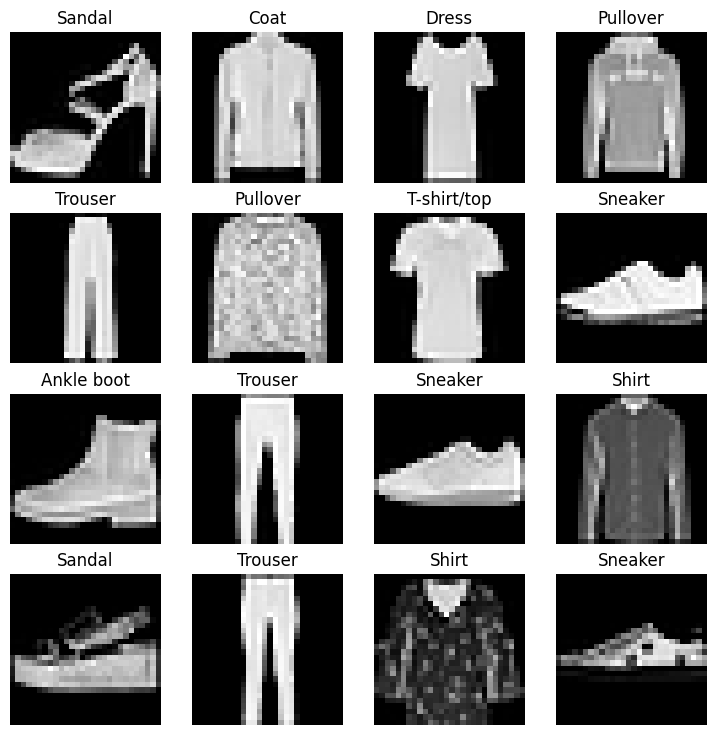

In [14]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? or do you think we'll need non-linearities

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

Most specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradients per epoch.     

In [15]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [16]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [17]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c923d237c40>,
 <torch.utils.data.dataloader.DataLoader at 0x7c923d237b50>)

In [18]:
# Let's check out what we've created
print(f"Dataloader: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}....")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}....")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7c923d237c40>, <torch.utils.data.dataloader.DataLoader object at 0x7c923d237b50>)
Length of train dataloader: 1875 batches of 32....
Length of test dataloader: 313 batches of 32....


In [19]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [20]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]


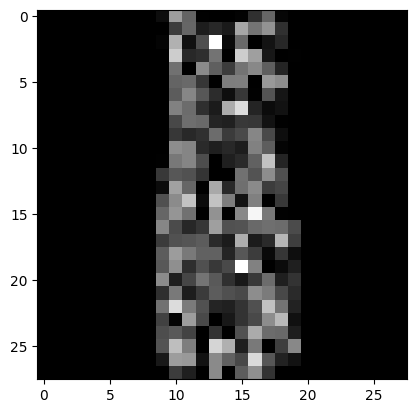

In [21]:
img, label
plt.imshow(img.squeeze(), cmap='gray')

## 3. Model 0: Build a basline model

when starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply add complexity when necessary:


In [22]:
# Create a flattened layer.
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [23]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features= output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [24]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape= 784, # this is 28*28
    hidden_units=10, # how many units in hidden layer
    output_shape=len(class_names) # One for every class

).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [25]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class classification, our loss function will be `nn.CrossEntropyLoss`

* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we are working on a classification problem, let's use accuracy as our evaluation metric.

In [26]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

# from helper_functions import plot_predictions, plot_decision_boundary

In [27]:
# Import accuracy metric
# from helper_functions import accuracy_fn


# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr =0.1)


##3 3.2 Creating a function to time our experiments

machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [28]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):

  """Prints difference between start and end time. """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [29]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [30]:
start_time = timer()
# some code ...
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


2.805200000466357e-05

###  3.3 Creating a training loop and training a model on batches of data....

1. Loop through epochs.
2. Loop through training batches, perform training steps, and calculate the training loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun ).

In [31]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  ## Training
  train_loss = 0

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)

    train_loss += loss # Accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples."
      )
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ## Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.43%

Train time on cpu: 36.791 seconds


In [32]:
next(model_0.parameters()).device

device(type='cpu')

## 4. Make predictions and get Model 0 results

In [33]:
torch.manual_seed(42)

def eval_model (model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn):

  """Returns a dictionary containing the results of model predicting on data_loader. """

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,  # Only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}


# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

# 5. Setup device agnostic code (for using a GPU if there is one)


In [34]:
torch.cuda.is_available()

True

In [35]:
# Setup device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

we learn about the power of non-linearity in the model.

In [36]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),


    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [37]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if it's available

## 6.1 Setup loss, optimizer and evaluation metrics

In [38]:
loss_fn = nn.CrossEntropyLoss() # Measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(),lr =0.1) # Tries to update our model's parameters to reduce the loss

## 6.2 Functioning training and evaluation/testing loops

Let's create a function for
* training loop - `train_step`
* testing loop - `test_step`

In [39]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [40]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,  # Add accuracy_fn argument here
               device: torch.device = device):

    """Performs a training with a model trying to learn on data_loader."""
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss and accuracy(per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # Accumulate train loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  # Calculate accuracy

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()

    # Divide total train loss and accuracy by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [41]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  """Performs a testing loop step on model going over data_loader."""

  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X_test, y_test in data_loader:

      # Send the data to the target device
      X_test, y_test = X_test.to(device), y_test.to(device)
      # 1. Forward pass
      test_pred = model(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

    # Calculate the test loss average per batch
    test_loss /= len(data_loader)

    # Calculate the test acc average per batch
    test_acc /= len(data_loader)

  # Print out what's happening
  print(f"Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%\n")



In [42]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer

start_time_start_on_gpu = timer()

# Set epochs
epochs = 10

# Create a optimization and evaluation loop using train_step() and test_step ()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epochs}\n-------")
  train_step(model=model_1,
           data_loader=train_dataloader,
           loss_fn=loss_fn,
           optimizer=optimizer,
           accuracy_fn=accuracy_fn,  # Pass accuracy_fn here
           device=device)

  test_step(model = model_1 ,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=start_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 10
-------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.9564, Test acc: 65.00%

Epoch: 10
-------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.7223, Test acc: 73.91%

Epoch: 10
-------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.6850, Test acc: 75.02%

Epoch: 10
-------
Train loss: 0.64384 | Train acc: 76.52%
Test loss: 0.6508, Test acc: 76.13%

Epoch: 10
-------
Train loss: 0.62892 | Train acc: 77.00%
Test loss: 0.6528, Test acc: 75.95%

Epoch: 10
-------
Train loss: 0.61569 | Train acc: 77.43%
Test loss: 0.6452, Test acc: 76.54%

Epoch: 10
-------
Train loss: 0.60672 | Train acc: 77.80%
Test loss: 0.6288, Test acc: 76.67%

Epoch: 10
-------
Train loss: 0.47135 | Train acc: 83.09%
Test loss: 0.4477, Test acc: 84.30%

Epoch: 10
-------
Train loss: 0.39947 | Train acc: 85.96%
Test loss: 0.4411, Test acc: 84.75%

Epoch: 10
-------
Train loss: 0.39380 | Train acc: 86.17%
Test loss: 0.4329, Test acc: 84.82%

Train time on cuda: 111.820 seconds


In [43]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

**Note:** Sometimes, depending on your data hardware you might find that your model trains faster on CPU than GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.

2. The hardware you're using has a better CPU in terms of compute capability than the GPU.

In [44]:
torch.manual_seed(42)

def eval_model (model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn ,
                device=device):

  """Returns a dictionary containing the results of model predicting on data_loader. """

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:

      #Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,  # Only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}


# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [45]:
# Get model_1 results dictionay
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.43290942907333374,
 'model_acc': 84.82428115015975}

## Model 2: Building a Convolutional Neural Network

CNN's are also known ConvNets.

CNN's are known for their capability to find patterns in visual data

Layer -> block -> Architecture

In [80]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,  # Conv2d for 2 dimensional data(images)
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Values we can set ourselves in our NN's are called hyperparameters

        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)


    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)


    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [47]:
image.shape

torch.Size([1, 28, 28])

In [81]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [62]:
image.shape

torch.Size([1, 28, 28])

In [66]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [70]:
model_2(rand_image_tensor.unsqueeze(dim=0).to(device))

Output shape of conv_block_1: torch.Size([1, 10, 14, 14])
Output shape of conv_block_2: torch.Size([1, 10, 7, 7])
Output shape of classifier: torch.Size([1, 10])


tensor([[ 0.0365, -0.0850,  0.0678, -0.0330,  0.0124,  0.0264,  0.0181, -0.0092,
         -0.0174, -0.0259]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
model_2.state_dict()

### 7.1 Stepping through `nn.Conv2d()`

In [ ]:
# Let's create some dummy data
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))

test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n{test_image}")

In [51]:
test_image.shape

torch.Size([3, 64, 64])

In [52]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels = 64,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([64, 62, 62])

In [53]:
# To add extra dimension on our data
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

In [54]:
test_image.shape

torch.Size([3, 64, 64])

In [55]:
# Print out the original image shape without unsqueezed dimension
print(f"Test Image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.Maxpol2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test Image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 64, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 64, 31, 31])


In [57]:
torch.manual_seed(42)

# Create a random tensor with a similar number of  dimensions to our image

random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f'\nRandom tensor:\n {random_tensor}')
print(f'Random tensor shape: {random_tensor.shape}')

# Create a MaxPool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax pool tensor:\n {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')
random_tensor



Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

## 7.3 Setup a loss function and optimizer

In [83]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() # includes softmax

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
model_2.state_dict()

## 7.4 Training and testing model_2 using our training and test function

In [84]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):

  print(f"Epoch: {epoch}\n---------")

  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)


train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59271 | Train acc: 78.51%
Test loss: 0.3944, Test acc: 85.88%

Epoch: 1
---------
Train loss: 0.36104 | Train acc: 86.97%
Test loss: 0.3479, Test acc: 87.11%

Epoch: 2
---------
Train loss: 0.32319 | Train acc: 88.36%
Test loss: 0.3285, Test acc: 87.92%

Train time on cuda: 40.819 seconds


In [86]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device = device)

In [87]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32850316166877747,
 'model_acc': 87.91932907348243}

# 8. Compare model results and training time

In [88]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.432909,84.824281
2,FashionMNISTModelV2,0.328503,87.919329


In [89]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,36.790980
1,FashionMNISTModelV1,0.432909,84.824281,111.820120
2,FashionMNISTModelV2,0.328503,87.919329,40.819155


Text(0, 0.5, 'model')

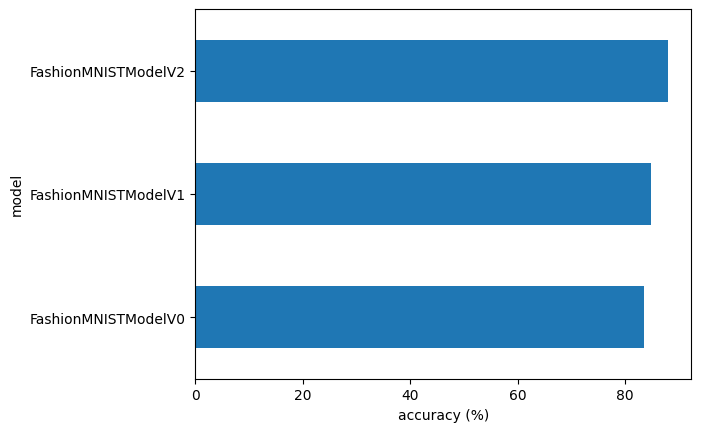

In [91]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

# 9. Make and evaluate random predictions with best model

In [111]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  pred_probs = []
  model.eval().to(device)
  with torch.inference_mode():
    for sample in data:
      # Prepare sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits )
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off GPU for further calculation
      pred_probs.append(pred_prob.cpu())


  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)



In [93]:
test_data[0][:10]

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [95]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [115]:
import random
# random.seed(42)
test_sample = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_sample.append(sample)
  test_labels.append(label)


# View the first sample shape
test_sample[0].shape



torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

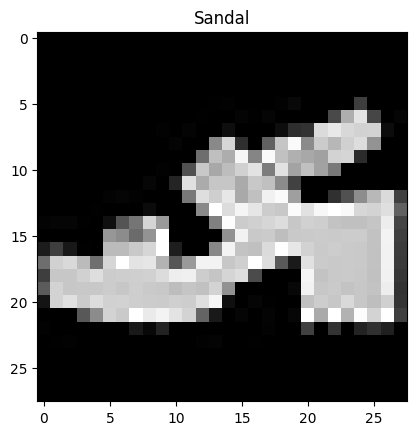

In [100]:
plt.imshow(test_sample[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [101]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_sample)


# View the first prediction probabilities
pred_probs[:2]

tensor([[1.0010e-07, 5.1992e-08, 9.5408e-08, 4.1066e-07, 8.0320e-08, 9.9975e-01,
         6.0917e-07, 2.7776e-05, 9.5855e-05, 1.2572e-04],
        [2.1820e-01, 2.5232e-01, 3.7476e-03, 3.0462e-01, 5.4996e-02, 1.3828e-04,
         1.6399e-01, 8.1796e-04, 6.0479e-04, 5.5123e-04]])

In [102]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [103]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

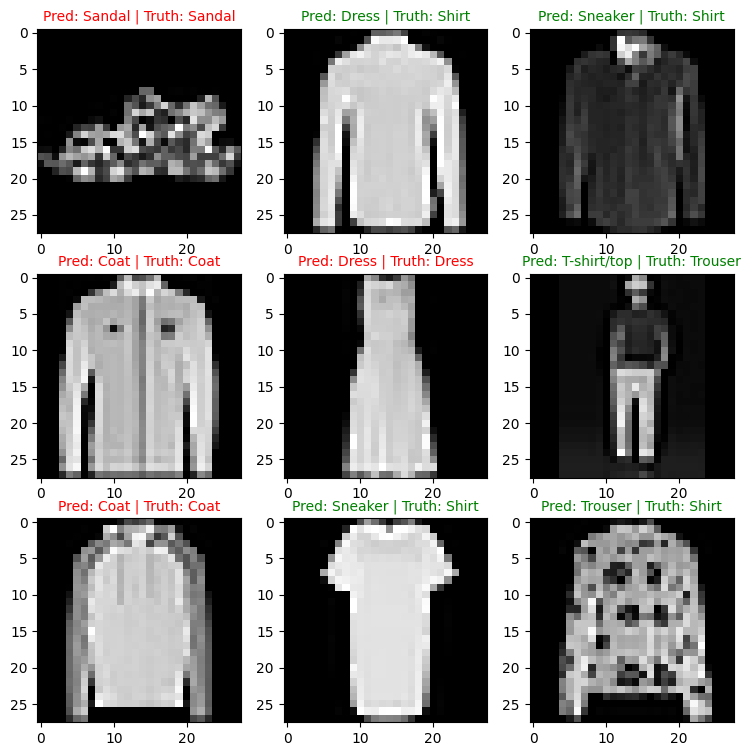

In [116]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_sample):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form )

  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if correct

  else:
    plt.title(title_text, fontsize=10, c="r") # red text if wrong